<a href="https://colab.research.google.com/github/riyagpt0251/earthquake-damage-prediction/blob/main/earthquakedamageprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


load the dataset

In [2]:
# Load dataset (update the path if needed)
data = pd.read_csv("csv_building_damage_assessment.csv")

# Display basic info
print(data.head())
print(data.info())
print(data.describe())


<ipython-input-2-970682c978fb>:2: DtypeWarning: Columns (35,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("csv_building_damage_assessment.csv")


    building_id  district_id  vdcmun_id  ward_id damage_overall_collapse  \
0  120101000011           12       1207   120703          Moderate-Heavy   
1  120101000021           12       1207   120703          Severe-Extreme   
2  120101000031           12       1207   120703          Moderate-Heavy   
3  120101000041           12       1207   120703          Moderate-Heavy   
4  120101000051           12       1207   120703     Insignificant/light   

  damage_overall_leaning damage_overall_adjacent_building_risk  \
0    Insignificant/light                                   NaN   
1         Severe-Extreme                   Insignificant/light   
2         Moderate-Heavy                        Moderate-Heavy   
3         Moderate-Heavy                        Moderate-Heavy   
4                    NaN                                   NaN   

  damage_foundation_severe damage_foundation_moderate  \
0                      NaN      Moderate-Heavy-(<1/3)   
1    Severe-Extreme-(>2/3)      

data prerprocessing

In [4]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values
# For numerical columns, fill with median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns, fill with the most frequent value
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


split dataset

In [5]:
# Separate features and target variable
X = data.drop("damage_grade", axis=1)  # Features
y = data["damage_grade"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train the model

In [7]:
# Handle missing values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Ensure all features are numeric
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46459 entries, 0 to 46458
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   building_id                                           46459 non-null  int64  
 1   district_id                                           46459 non-null  int64  
 2   vdcmun_id                                             46459 non-null  int64  
 3   ward_id                                               46459 non-null  int64  
 4   damage_overall_collapse                               46459 non-null  int64  
 5   damage_overall_leaning                                46459 non-null  int64  
 6   damage_overall_adjacent_building_risk                 46459 non-null  int64  
 7   damage_foundation_severe                              46459 non-null  int64  
 8   damage_foundation_moderate                            46

In [8]:
# Verify there are no object or string columns
print(data.dtypes)

# Check for any remaining NaN values
print(data.isnull().sum())


building_id                             int64
district_id                             int64
vdcmun_id                               int64
ward_id                                 int64
damage_overall_collapse                 int64
                                       ...   
has_geotechnical_risk_liquefaction    float64
has_geotechnical_risk_landslide       float64
has_geotechnical_risk_rock_fall       float64
has_geotechnical_risk_flood           float64
has_geotechnical_risk_other           float64
Length: 79, dtype: object
building_id                           0
district_id                           0
vdcmun_id                             0
ward_id                               0
damage_overall_collapse               0
                                     ..
has_geotechnical_risk_liquefaction    0
has_geotechnical_risk_landslide       0
has_geotechnical_risk_rock_fall       0
has_geotechnical_risk_flood           0
has_geotechnical_risk_other           0
Length: 79, dtype: int64


evaluate the model

In [10]:
# Ensure the model is fitted before predicting
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(model)
    print("The model is properly trained.")
except Exception as e:
    print("Model is not fitted. Error:", e)


The model is properly trained.


In [11]:
# Check for any non-numeric data
print(X_train.dtypes)

# Check for any NaN or missing values
print(X_train.isnull().sum())

# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


building_id                             int64
district_id                             int64
vdcmun_id                               int64
ward_id                                 int64
damage_overall_collapse                object
                                       ...   
has_geotechnical_risk_liquefaction    float64
has_geotechnical_risk_landslide       float64
has_geotechnical_risk_rock_fall       float64
has_geotechnical_risk_flood           float64
has_geotechnical_risk_other           float64
Length: 78, dtype: object
building_id                           0
district_id                           0
vdcmun_id                             0
ward_id                               0
damage_overall_collapse               0
                                     ..
has_geotechnical_risk_liquefaction    0
has_geotechnical_risk_landslide       0
has_geotechnical_risk_rock_fall       0
has_geotechnical_risk_flood           0
has_geotechnical_risk_other           0
Length: 78, dtype: int64
X_t

In [13]:
# Check the data types of X_train
print(X_train.dtypes)

# Check for unique values in each column to identify any remaining strings
for col in X_train.columns:
    print(f"Unique values in {col}: {X_train[col].unique()[:5]}")  # Display the first 5 unique values


building_id                             int64
district_id                             int64
vdcmun_id                               int64
ward_id                                 int64
damage_overall_collapse                object
                                       ...   
has_geotechnical_risk_liquefaction    float64
has_geotechnical_risk_landslide       float64
has_geotechnical_risk_rock_fall       float64
has_geotechnical_risk_flood           float64
has_geotechnical_risk_other           float64
Length: 78, dtype: object
Unique values in building_id: [120509000211 121302000461 123608000521 122202000052 124703000491]
Unique values in district_id: [12 20 21]
Unique values in vdcmun_id: [1207 1201 1204 1205 1206]
Unique values in ward_id: [120707 120104 120409 120504 120605]
Unique values in damage_overall_collapse: ['Moderate-Heavy' 'Insignificant/light' 'Severe-Extreme']
Unique values in damage_overall_leaning: ['Severe-Extreme' 'Insignificant/light' 'Moderate-Heavy']
Unique values

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [15]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [16]:
print(X_train.dtypes)  # Ensure all columns are numeric
print(X_train.isnull().sum())  # Check for missing values


building_id                             int64
district_id                             int64
vdcmun_id                               int64
ward_id                                 int64
damage_overall_collapse                 int64
                                       ...   
has_geotechnical_risk_liquefaction    float64
has_geotechnical_risk_landslide       float64
has_geotechnical_risk_rock_fall       float64
has_geotechnical_risk_flood           float64
has_geotechnical_risk_other           float64
Length: 78, dtype: object
building_id                           0
district_id                           0
vdcmun_id                             0
ward_id                               0
damage_overall_collapse               0
                                     ..
has_geotechnical_risk_liquefaction    0
has_geotechnical_risk_landslide       0
has_geotechnical_risk_rock_fall       0
has_geotechnical_risk_flood           0
has_geotechnical_risk_other           0
Length: 78, dtype: int64


retrain the model

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8786052518295308


evaluate the model

Accuracy Score: 0.8786052518295308

Classification Report:
               precision    recall  f1-score   support

     Grade 1       0.91      0.87      0.89      1777
     Grade 2       0.81      0.83      0.82      1977
     Grade 3       0.84      0.86      0.85      2123
     Grade 4       0.89      0.92      0.90      2070
     Grade 5       0.99      0.94      0.96      1345

    accuracy                           0.88      9292
   macro avg       0.89      0.88      0.88      9292
weighted avg       0.88      0.88      0.88      9292



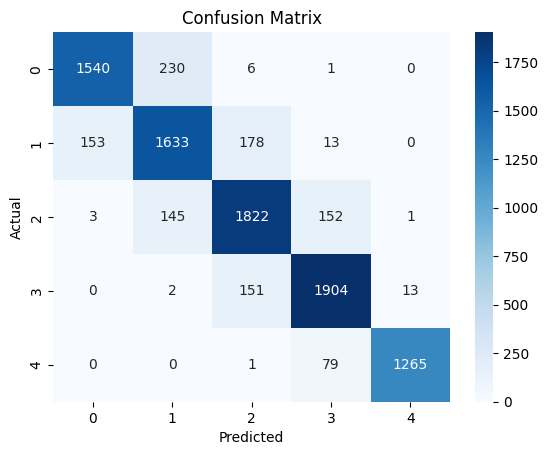

In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


faeture importance

<ipython-input-19-d6259a3c20ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


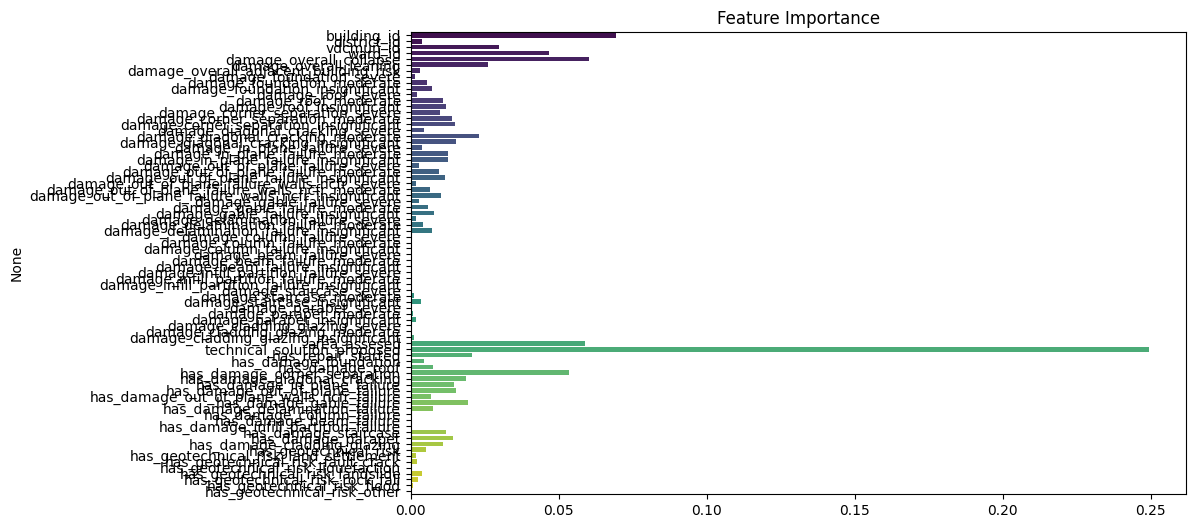

In [19]:
# Plot feature importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.show()


save the model

In [20]:
import joblib

# Save the trained model
joblib.dump(model, "earthquake_damage_model.pkl")

# Load the model (for later use)
loaded_model = joblib.load("earthquake_damage_model.pkl")
